In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from PIL import Image


### Bounding Box Plotting 

In [19]:
# let us define a function for converting the bounding boxes interchangably to 2 popular formats
# center one being -> (center, width, height)
# corner one being (upper_left, lower_right)
def bbox_center_to_corner(boxes):
    x, y, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    up_x, up_y = x - 0.5*w,  y - 0.5*h
    down_x, down_y = x + 0.5*w,  y + 0.5*h
    return np.stack((up_x,  up_y, down_x, down_y), axis=-1)

def bbox_corner_to_center(boxes):
    up_x, up_y, down_x, down_y = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx, cy = (up_x + down_x)/2, (up_y + down_y)/2
    width = down_x - up_x
    height = down_y - up_y
    return np.stack((cx, cy, width, height), axis=-1)

def plot_bbox(box):
    # i expect my bounding boxes in the center format always
    cx, cy, width, height = box[0], box[1], box[2], box[3]
    return plt.Rectangle(xy = (cx-0.5*width, cy-0.5*height), width=width, height=height, edgecolor='r', fill=False,
                         linewidth=1)

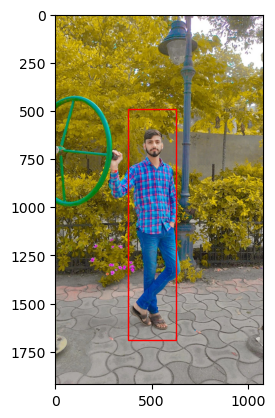

In [21]:
path = "C:\\Users\\Ayush\\Desktop\\PHOTOS\\ak.JPG"
img = np.array(Image.open(path))
bbox = [500, 1090, 250, 1200]  # (center_coordinates as x and y, width, height)
# now i have to draw a rectangle around the picture
# matplotlib rectangle object expects the rectangle in corner format
fig = plt.imshow(img)
fig.axes.add_patch(plot_bbox(bbox))     
plt.show()
# can plot multiple bounding boxes by add_patch functionality 

### Anchor Boxes
* Anchor Boxes are nothing just the preassumed bounding boxes for each pixel in the image.
* Anchor Boxes of each pixels assume the center of pixel as their center and height and width being hs$\sqrt r$ and   ws$\sqrt(r)$ where r is the aspect ratio (width to height ratio of the bbox) and s is the scaling parameter.

In [ ]:
# num_pixels = width*height
# num_anchor_boxes = num_pixels*n*m
# aspect ratio is represented by ratios
# sizes means scale sizes i guess
def generate_boxes_for_image_pixel2pixel(image, scales, aspect_ratios):
    h, w, _ = image.shape
    num_boxes_per_pixel = len(scales) + len(aspect_ratios) - 1
    '''
    Will assign first all aspect ratios with first scale and 
    will assign all sclaes with first aspect ratio
    '''
    pass
    
    

### IoU(Intersection over Union)
* It is a measure of checking how well our algorithm is performing by comparing the intersection and union of area of predicted and ground reality bounding box.

In [37]:
def IOU(pred_box, ground_truth_box):
    # i am expecting boxes in corner representation
    box_area = lambda box: (box[2]-box[0])*(box[3]-box[1])
    x1 = max(pred_box[0], truth_box[0])
    y1 = max(pred_box[1], truth_box[1])
    x2 = min(pred_box[2], truth_box[2])
    y2 = min(pred_box[3], truth_box[3])
    intersection = 0
    union = box_area(pred_box) + box_area(truth_box)
    if x1<x2 and y1<y2:
        intersection = box_area([x1, y1, x2, y2])
    union-= intersection
    return intersection/union

### YOLO ARCHITECTURE